# Download the data, unzip, install required libraries
librosa: audio processing library

In [2]:
!wget "https://www.dropbox.com/scl/fo/n89uejtoosme0h2bk80ai/ALDh6-eqFg6UkqqmfcHjXsU?dl=0&rlkey=anerlnyh50taar4cnq7dl7dld" -O CAP6610SP24_test_set.zip

--2024-04-09 17:49:15--  https://www.dropbox.com/scl/fo/n89uejtoosme0h2bk80ai/ALDh6-eqFg6UkqqmfcHjXsU?dl=0&rlkey=anerlnyh50taar4cnq7dl7dld
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc48e37596c481e0421f2b0c2489.dl.dropboxusercontent.com/zip_download_get/B0EgXd5LRY1zlp6x0Y9x_0hQKFN7O9Edh4AFhQPmqL5mfUuKB-cUw7rz9shVZ7xlhrEVEiyzsTFc8Eak3a2qZsMs2-ZYsoOpAwdVWIti6Zqorw# [following]
--2024-04-09 17:49:16--  https://uc48e37596c481e0421f2b0c2489.dl.dropboxusercontent.com/zip_download_get/B0EgXd5LRY1zlp6x0Y9x_0hQKFN7O9Edh4AFhQPmqL5mfUuKB-cUw7rz9shVZ7xlhrEVEiyzsTFc8Eak3a2qZsMs2-ZYsoOpAwdVWIti6Zqorw
Resolving uc48e37596c481e0421f2b0c2489.dl.dropboxusercontent.com (uc48e37596c481e0421f2b0c2489.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting to uc48e37596c481e0421f2b0c2489.dl.d

In [1]:
!unzip ./CAP6610SP24_test_set.zip

Archive:  ./CAP6610SP24_test_set.zip
mapname:  conversion of  failed
   creating: Other/
   creating: Not_Progressive_Rock/
   creating: Progressive Rock Songs/
 extracting: Other/01 Arithmophobia.mp3  
 extracting: Other/PERIPHERY - Zyglrox.mp3  
 extracting: Not_Progressive_Rock/10 I.mp3  
 extracting: Other/Meshuggah- Soul Burn.mp3  
 extracting: Other/06 A Light Will Shine.mp3  
 extracting: Not_Progressive_Rock/06 How.mp3  
 extracting: Other/05. Physical Education.mp3  
 extracting: Other/SikTh - Hold My Finger.mp3  
 extracting: Not_Progressive_Rock/Reptile.mp3  
 extracting: Not_Progressive_Rock/Bambola.mp3  
 extracting: Other/Veil Of Maya - Punisher.mp3  
 extracting: Not_Progressive_Rock/15 - Tam.mp3  
 extracting: Other/CHIMP SPANNER - Bad Code.mp3  
 extracting: Other/The Algorithm - Isometry.mp3  
 extracting: Progressive Rock Songs/08 .3 1.m4a  
 extracting: Other/01-darko_us-splinter_cell.mp3  
 extracting: Other/03 - Language II Conspire.mp3  
 extracting: Progressive 

In [ ]:
# !pip3 install librosa # https://librosa.org/doc/latest/index.html
# !pip install pydub

In [1]:
import os
import random
import numpy as np
import pandas as pd
from pydub import AudioSegment
import matplotlib.pyplot as plt
import librosa

Load one song, sample rate (sr) is freq at which we sample points in the audio

In [2]:
y, sr = librosa.load('./Progressive Rock Songs/01 - Red.mp3', sr=11025, mono=True)
y, index = librosa.effects.trim(y)
y = librosa.util.normalize(y)

## break song to 10 second snippets and analyze one such snippet

37
Shape of the spectrogram: (128, 216)
Shape of the mfccs: (20, 216)
Shape of the chroma: (12, 216)
Shape of the beats: (128, 216)
Shape of the tempo: ()
Shape of the beat_time: (29,)
Shape of the input tensor: torch.Size([1, 160, 216])
(128, 216)
(20, 216)
(12, 216)
(110250,)


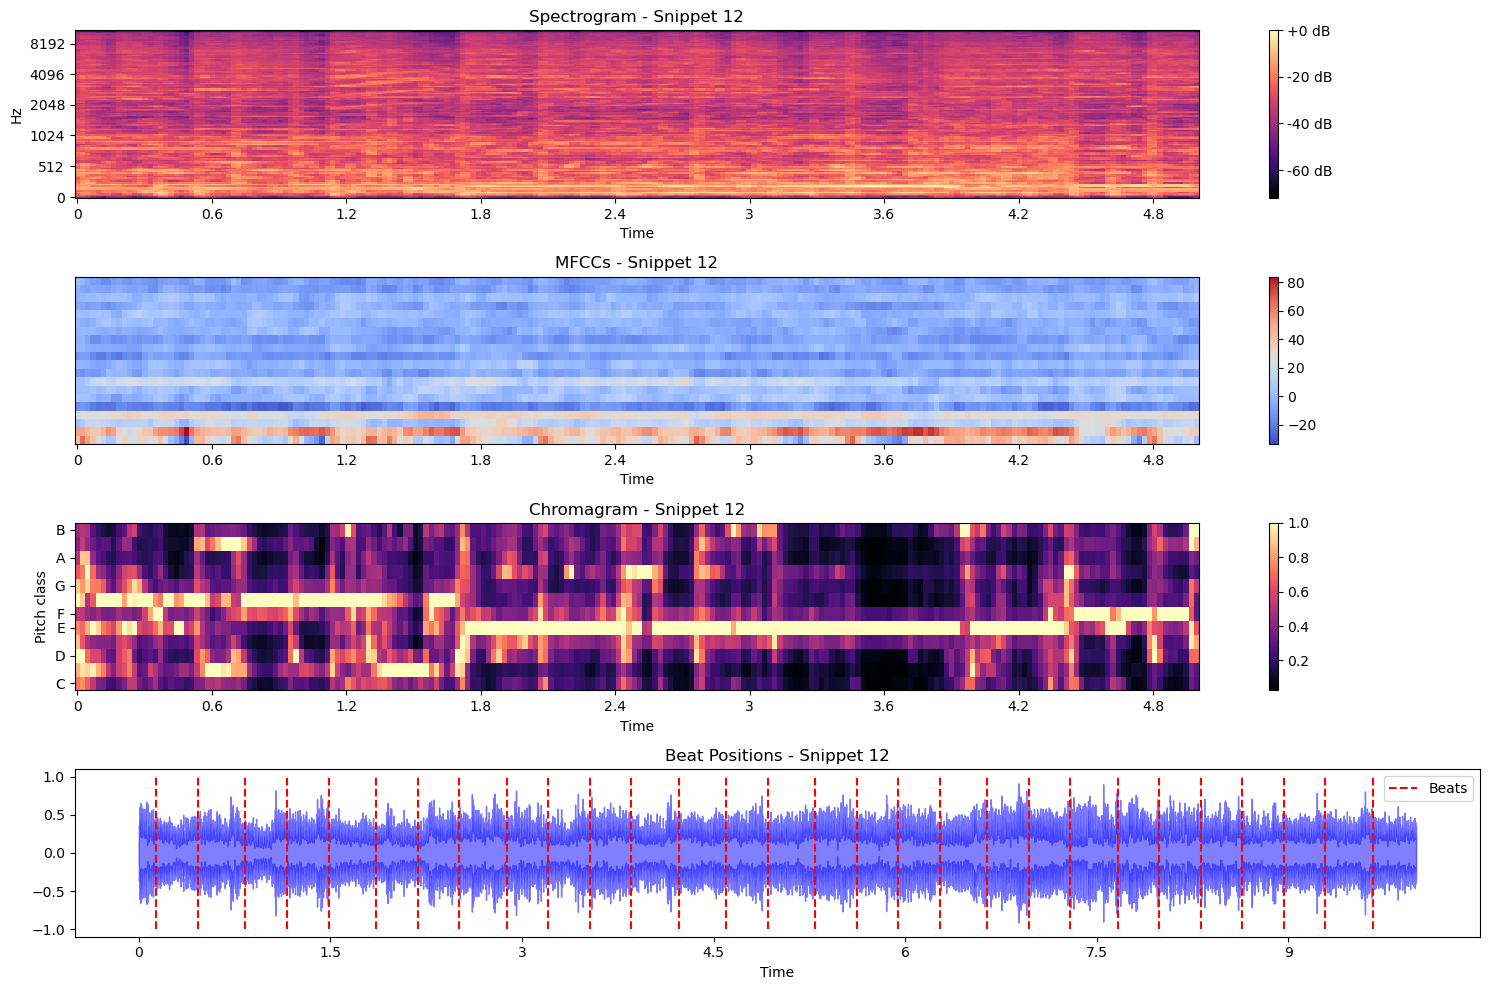

In [5]:
# Refer: https://chat.openai.com/share/9620140d-254f-45b4-aa6b-df3376965ab7

# TRYING out one song
import torch
snippet_duration = 10

# Calculate the number of snippets
num_snippets = int(len(y) / (sr * snippet_duration))
print(num_snippets)
# Analyze each snippet
for i in range(11,12):
    # Extract the snippet
    start_time = i * snippet_duration
    end_time = (i + 1) * snippet_duration
    snippet = y[int(start_time * sr):int(end_time * sr)]

    # 1. Spectral Features

    # Spectrogram
    spectrogram = librosa.feature.melspectrogram(y=snippet, sr=sr)
    print("Shape of the spectrogram:",spectrogram.shape)
    # MFCCs
    mfccs = librosa.feature.mfcc(y=snippet, sr=sr)
    print("Shape of the mfccs:",mfccs.shape)
    # Chromagram
    chroma = librosa.feature.chroma_stft(y=snippet, sr=sr)
    print("Shape of the chroma:",chroma.shape)
    # Beats
    db_s = librosa.power_to_db(spectrogram, ref=np.max)
    print("Shape of the beats:",db_s.shape)
    # 2. Rhythm and Tempo Features
    # Tempo and beat frames
    tempo, beat_frames = librosa.beat.beat_track(y=snippet, sr=sr)
    # Convert beat frames to times
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    print("Shape of the tempo:",tempo.shape)
    print("Shape of the beat_time:",beat_times.shape)
    spectrogram_tensor = torch.tensor(db_s)
    mfccs_tensor = torch.tensor(mfccs)
    chroma_tensor = torch.tensor(chroma)

# Concatenate along the feature dimension
    concatenated_features = torch.cat((spectrogram_tensor,mfccs_tensor, chroma_tensor), dim=0)

# Transpose to have snippets along the batch dimension
    input_tensor = concatenated_features.unsqueeze(0)

# Print the shape of the input tensor
    print("Shape of the input tensor:", input_tensor.shape)



    # # Plotting for illustration purposes (customize as needed)


    plt.figure(figsize=(15, 10))

    # Plot Spectrogram
    plt.subplot(4, 1, 1)
    print(db_s.shape)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
    plt.title(f'Spectrogram - Snippet {i + 1}')
    plt.colorbar(format='%+2.0f dB')

    # Plot MFCCs
    plt.subplot(4, 1, 2)
    print(mfccs.shape)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title(f'MFCCs - Snippet {i + 1}')
    plt.colorbar()

    # Plot Chromagram
    plt.subplot(4, 1, 3)
    print(chroma.shape)
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.title(f'Chromagram - Snippet {i + 1}')
    plt.colorbar()

    # Plot Beat Positions
    plt.subplot(4, 1, 4)
    print(snippet.shape)
    librosa.display.waveshow(snippet, sr=sr, alpha=0.5, color="blue")
    plt.vlines(beat_times, ymin=-1, ymax=1, color='r', linestyle='--', label='Beats')
    plt.legend()
    plt.title(f'Beat Positions - Snippet {i + 1}')


    plt.tight_layout()
    plt.show()
    # [in_channels, seq_length]

In [24]:
import scipy.signal 
np.hanning(5)

array([0. , 0.5, 1. , 0.5, 0. ])

In [6]:
## TASK
import os

progressive_rock_dir = './Progressive_Rock_Songs'
non_progressive_rock_dir_1 = './Not_Progressive_Rock/Other_Songs'
non_progressive_rock_dir_2 = './content/Not_Progressive_Rock'

# Count songs in progressive rock directory
progressive_rock_songs = len(os.listdir(progressive_rock_dir))

# Count songs in non-progressive rock directories
non_progressive_rock_songs = 0
for directory in [non_progressive_rock_dir_1, non_progressive_rock_dir_2]:
  non_progressive_rock_songs += len(os.listdir(directory))

# Print the counts
print(f"Number of progressive rock songs: {progressive_rock_songs}")
print(f"Number of non-progressive rock songs: {non_progressive_rock_songs}")

FileNotFoundError: [Errno 2] No such file or directory: './Progressive_Rock_Songs'

# Task 1: Split the set of songs into two sets. Validation and training (20%/80%).
## reason for doing it at the source (and not train_test_split) is that we're breaking individual songs into snippets, so it's hard to keep track of songs.

In [ ]:
progressive_rock_dir = '/content/Progressive_Rock_Songs'
non_progressive_rock_dir_1 = '/content/Not_Progressive_Rock/Other_Songs'
non_progressive_rock_dir_2 = '/content/Not_Progressive_Rock/Top_Of_The_Pops'




/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file
/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file
/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file
/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
progressive_rock_songs = len(os.listdir(progressive_rock_dir))

# Count songs in non-progressive rock directories
non_progressive_rock_songs = 0
for directory in [non_progressive_rock_dir_1, non_progressive_rock_dir_2]:
  non_progressive_rock_songs += len(os.listdir(directory))

# Print the counts
print(f"Number of progressive rock songs: {progressive_rock_songs}")
print(f"Number of non-progressive rock songs: {non_progressive_rock_songs}")

Number of progressive rock songs: 113
Number of non-progressive rock songs: 303


In [ ]:
# Path to the directories
def collect_songs (directory, is_prog):
  all_input_tensors = []
  cnt = 1
  for root, dirs, files in os.walk(directory):
    for file in files:
      if file.lower().endswith(('.mp3', '.wav')):
        print(cnt)
        cnt = cnt+1
        file_path = os.path.join(root, file)
        song_name = os.path.splitext (file) [0]
        # song_length = get_song_length(file_path)
        y, sr = librosa.load(file_path, sr=11025)
        y, index = librosa.effects.trim(y)
        # need to normalize this.
        y = librosa.util.normalize(y)
        snippet_duration = 10 #### UPDATED to 10 seconds to tensor size will be different

# Calculate the number of snippets
        num_snippets = int(len(y) / (sr * snippet_duration))

        # Analyze each snippet
        for i in range(num_snippets):
            # Extract the snippet
          start_time = i * snippet_duration
          end_time = (i + 1) * snippet_duration
          snippet = y[int(start_time * sr):int(end_time * sr)]

            # 1. Spectral Features
            # Spectrogram
          spectrogram = librosa.feature.melspectrogram(y=snippet, sr=sr)
            # MFCCs
          mfccs = librosa.feature.mfcc(y=snippet, sr=sr)
            # Chromagram
          chroma = librosa.feature.chroma_stft(y=snippet, sr=sr)
            # Beats
          db_s = librosa.power_to_db(spectrogram, ref=np.max)

            # 2. Rhythm and Tempo Features
            # Tempo and beat frames
          tempo, beat_frames = librosa.beat.beat_track(y=snippet, sr=sr)
            # Convert beat frames to times
          beat_times = librosa.frames_to_time(beat_frames, sr=sr)

          spectrogram_tensor = torch.tensor(spectrogram) ## replace spectrogram with beats (db_s) HERE
          mfccs_tensor = torch.tensor(mfccs)
          chroma_tensor = torch.tensor(chroma)

        # Concatenate along the feature dimension
          concatenated_features = torch.cat((spectrogram_tensor, mfccs_tensor, chroma_tensor), dim=0)

        # Transpose to have snippets along the batch dimension
          input_tensor = concatenated_features.T.unsqueeze(0)
          all_input_tensors.append(input_tensor)
          # print(len(all_input_tensors))
          # print(input_tensor.shape)
            # all_input_tensors.append(input_tensor)
          # Concatenate all input tensors along the batch dimension
            # all_input_tensors = torch.cat(input_tensor, dim=0)
    return all_input_tensors


# Collect song data from both directories
# progressive_rock_songs = collect_songs(progressive_rock_dir, is_prog=True)
# all_input_tensors.shape


Validation tensors

In [ ]:
def collect_songs_validation (directory, is_prog):
  main_list = []
  cnt = 1
  for root, dirs, files in os.walk(directory):
    for file in files:
      song_list = []
      if file.lower().endswith(('.mp3', '.wav')):
        print(cnt)
        cnt = cnt+1
        file_path = os.path.join(root, file)
        song_name = os.path.splitext (file) [0]
        # song_length = get_song_length(file_path)
        y, sr = librosa.load(file_path, sr=11025)
        y, index = librosa.effects.trim(y)
        # need to normalize this.
        y = librosa.util.normalize(y)
        snippet_duration = 10 #### UPDATED to 10 seconds to tensor size will be different

        num_snippets = int(len(y) / (sr * snippet_duration))

        # Analyze each snippet
        for i in range(num_snippets):
            # Extract the snippet
          start_time = i * snippet_duration
          end_time = (i + 1) * snippet_duration
          snippet = y[int(start_time * sr):int(end_time * sr)]

            # 1. Spectral Features
            # Spectrogram
          spectrogram = librosa.feature.melspectrogram(y=snippet, sr=sr)
            # MFCCs
          mfccs = librosa.feature.mfcc(y=snippet, sr=sr)
            # Chromagram
          chroma = librosa.feature.chroma_stft(y=snippet, sr=sr)
            # Beats
          db_s = librosa.power_to_db(spectrogram, ref=np.max)

            # 2. Rhythm and Tempo Features
            # Tempo and beat frames
          tempo, beat_frames = librosa.beat.beat_track(y=snippet, sr=sr)
            # Convert beat frames to times
          beat_times = librosa.frames_to_time(beat_frames, sr=sr)

          spectrogram_tensor = torch.tensor(spectrogram) ## replace spectrogram with beats (db_s) HERE
          mfccs_tensor = torch.tensor(mfccs)
          chroma_tensor = torch.tensor(chroma)

        # Concatenate along the feature dimension
          concatenated_features = torch.cat((spectrogram_tensor, mfccs_tensor, chroma_tensor), dim=0)

        # Transpose to have snippets along the batch dimension
          input_tensor = concatenated_features.T.unsqueeze(0)
          song_list.append(input_tensor)
          # print(len(all_input_tensors))
          # print(input_tensor.shape)
            # all_input_tensors.append(input_tensor)
          # Concatenate all input tensors along the batch dimension
            # all_input_tensors = torch.cat(input_tensor, dim=0)
      main_list.append(song_list)
    return main_list


# Collect song data from both directories
# progressive_rock_songs = collect_songs(progressive_rock_dir, is_prog=True)
# all_input_tensors.shape


In [ ]:
progressive_rock_songs_validation = "/content/prog-validation"
non_progressive_rock_songs_validation = "/content/non-prog-validation"
progressive_rock_songs_validation_songs = collect_songs_validation(progressive_rock_songs_validation, is_prog=True)

1


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [ ]:
non_progressive_rock_songs_validation_songs = collect_songs_validation(non_progressive_rock_songs_validation, is_prog=False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


<ipython-input-11-846d4920dd17>:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=11025)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


In [ ]:
len(non_progressive_rock_songs_validation_songs)
non_progressive_rock_songs_validation_songs[0][0].shape

torch.Size([1, 216, 160])

In [ ]:
# progressive_rock_songs_validation_tensor = torch.cat(progressive_rock_songs_validation_songs, dim=0)

# Save the tensor to a file
torch.save(progressive_rock_songs_validation_songs, "/content/progressive_rock_songs_validation_tensor.pt")

# non_progressive_rock_songs_validation_tensor = torch.cat(non_progressive_rock_songs_validation_songs, dim=0)

# Save the tensor to a file
torch.save(non_progressive_rock_songs_validation_songs, "/content/non_progressive_rock_songs_validation_tensor.pt")


!pip install google-colab
from google.colab import drive
drive.mount('/content/drive')

# Save the file to the root of your Drive
!zip -r both_tensors_160_216_validation_1.zip /content/progressive_rock_songs_validation_tensor.pt /content/non_progressive_rock_songs_validation_tensor.pt

!cp both_tensors_160_216_validation_1.zip "/content/drive/MyDrive"

In [ ]:
len(progressive_rock_songs)

In [ ]:
# prompt: convert progressive_rock_songs to tensor that is savable

progressive_rock_songs_tensor = torch.cat(progressive_rock_songs, dim=0)

# Save the tensor to a file
torch.save(progressive_rock_songs_tensor, "/content/progressive_rock_songs_tensor.pt")


In [ ]:
non_progressive_rock_songs = collect_songs(non_progressive_rock_dir_1, is_prog=False)
non_progressive_rock_songs += collect_songs(non_progressive_rock_dir_2, is_prog=False)

In [ ]:
non_progressive_rock_songs_tensor = torch.cat(non_progressive_rock_songs, dim=0)

# Save the tensor to a file
torch.save(non_progressive_rock_songs_tensor, "/content/non_progressive_rock_songs_tensor.pt")


In [ ]:
!pip install google-colab
from google.colab import drive
drive.mount('/content/drive')

# Save the file to the root of your Drive
!zip -r both_tensors_160_216.zip /content/non_progressive_rock_songs_tensor.pt /content/progressive_rock_songs_tensor.pt

In [ ]:
from google.colab import files

files.download("test.zip")

In [ ]:
# prompt: save both_tensors.zip to my drive

!cp both_tensors_160_216.zip "/content/drive/MyDrive"
